# 04_perceptron

# Q1. Logistic Sigomid について調べ説明せよ。

# A1. 

シグモイド関数は以下の式で表される。  
<img src="images/sigmid.png">

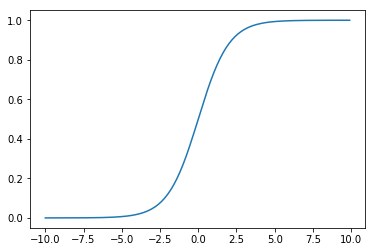

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import math


x = np.arange(-10, 10, 0.1)  # -10 ~ 10まで0.1刻み
e = math.e  # 自然対数 
y = 1 / (1 + e**-x)  # シグモイド関数

plt.plot(x, y)
plt.show()

- 標準シグモイド関数は a=1 を代入して表す。  
- シグモイド関数式の eは自然対数である。
- シグモイド関数の性質は、0から1の単調増加関数で1つの変曲点を持つ。  
- 単調増加関数とは、値の変化が一定に増加する連続関数である。  
- 変曲点とは、曲線の曲がる方向が変わる点である。  

引用：https://ja.wikipedia.org/wiki/%E3%82%B7%E3%82%B0%E3%83%A2%E3%82%A4%E3%83%89%E9%96%A2%E6%95%B0

# Q2. Logistic Sigmoid をアクティベーション関数として持つ<br>パーセプトロンのモデルについて調べ説明せよ。

# A2.

**パーセプトロンとは：**  
- パーセプトロンとは、視覚や脳の機能をモデル化したものでありパターン認識を行うシンプルなネットワーク。
- ネットワーク構成としては、(感覚層)入力層 → (連合層)中間層 → (反応層)出力層の3つからなる。  
- パターン認識とは、画像・音声などの雑多な情報を含むデータの中から、一定の規則や意味を持つ対象を選別して取り出す処理。  

**アクティベーション(活性化)関数とは：**  
- 伝達関数という意味でも捉えることができるが、入力層から与えられるデータが線形変換した後に、適用される関数
- パーセプトロンでの中間層にあたる。  



引用：  
https://ja.wikipedia.org/wiki/%E3%83%91%E3%83%BC%E3%82%BB%E3%83%97%E3%83%88%E3%83%AD%E3%83%B3  
https://ja.wikipedia.org/wiki/%E3%83%91%E3%82%BF%E3%83%BC%E3%83%B3%E8%AA%8D%E8%AD%98  

<img src="images/sigmoid_1.png">

# Q3. 0 を false, 1 を true としたとき、論理否定を行う関数を、<br>Logistic Sigmoid をアクティベーション関数として<br>持つパーセプトロンを用いて作成せよ。<br>パーセプトロンのパラメータの調整には平均二乗誤差と最急降下法を用いること。<br><br>また、調整済みのパラメータを保存し、作成した関数を他のプログラムからいつでも利用できるようにせよ。

# A3. 

入力層(式)  
$
y = wX + b
$

中間層(シグモイド関数: a=1とする)  
$ 
S = \frac{1}{1-e^ay}  
$

誤差関数(平均二乗誤差)  
$
E(w) = \frac{1}{2} \sum_{i} ((\frac{1}{1-e^-(wX+b)}) -正解値)^2
$

最急降下法  
- 重みを更新  
$
w^(k+1) = w^(k) - α\sum_{i}((\frac{1}{(1-e^-(wX+b))-正解値)(\frac{1}{1-e^-(wX+b)})}
$
 
- バイアスも同様に更新  
$
b^(k+1) = b^(k) - α\sum_{i}((\frac{1}{(1-e^-(wX+b))-正解値)(\frac{1}{1-e^-(wX+b)})}
$

<img src="images/bias.png">

In [2]:
from numpy.random import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


class Neuron:
    
    def __init__(self, w, b, α):
        print(w, b, α)
        self._w = w
        self._b = b
        self._α = α
        self._error = None
        self._e = math.e  # 自然対数

    def Input_layer(self, x):
        print("w : %s,  b : %s" % (self._w, self._b))  # 更新パラメータ表示
        y = self._w*x + self._b
        return y
    
    def activation_function(self, y):
        s = 1 / (1 + self._e**-y)
        return s
        
    def error_function(self, s, answer):
        self._error = 0.5*(s - answer)**2
        print("error: %s" % self._error)  # 誤差表示
        # return self._error
        
    def parameter_update(self, s):
        self._w = self._w - self._α*((1-s)*s)   # シグモイド関数の微分
        self._b = self._b - self._α*((1-s)*s)   # シグモイド関数の微分
        return self._w, self._b
#         self._w = self._w - self._α*(s - 1)*s  # w - α(誤差関数の微分)
#         self._b = self._b - self._α*(s - 1)*s  # w - α(誤差関数の微分)
        

if __name__=='__main__':      
    x = [0, 1]  # 入力値 0 or 1を入れる
    answer = [1, 0]  # 正解データ
    w = 0.5  # 初期値のパラメータ
    b = 0.5  # バイアス
    α = 0.1  # ハイパーパラメータ(更新の調整項)
    adjusted_parameter = {}  # 調整済みパラメータ
    
    neuron = Neuron(w, b, α)
    # 学習開始
    for _ in range(1000):
        y = neuron.Input_layer(x[0])  # 入力層
        s = neuron.activation_function(y)  # 中間層(シグモイド関数)
        neuron.error_function(s, answer[0])  # 誤差関数
        w, b = neuron.parameter_update(s)  # パラメータ更新
        
        print("s", s)
        if s >= 0.5:  # 中間層yにプラスの値が入ると0.5以上になる
            print("出力値：0")
            print("y : ", y)  # 中間層の値表示
        if s < 0.5:  # 中間層yにマイナスの値が入ると0.5未満になる
            adjusted_parameter["w"] = w
            adjusted_parameter["b"] = b
            print("出力値：1")
            break
     
    print("調整済みパラメータ", adjusted_parameter)

0.5 0.5 0.1
w : 0.5,  b : 0.5
error: 0.07126847829827546
s 0.6224593312018546
出力値：0
y :  0.5
w : 0.47649962877984053,  b : 0.47649962877984053
error: 0.07337477042320918
s 0.6169209731055244
出力値：0
y :  0.47649962877984053
w : 0.4528666801750348,  b : 0.4528666801750348
error: 0.07553583944056384
s 0.611320596273577
出力値：0
y :  0.4528666801750348
w : 0.4291059076905053,  b : 0.4291059076905053
error: 0.07775195973497
s 0.6056601472461349
出力値：0
y :  0.4291059076905053
w : 0.40522231436211276,  b : 0.40522231436211276
error: 0.08002331046323667
s 0.5999417280864282
出力値：0
y :  0.40522231436211276
w : 0.3812211492634029,  b : 0.3812211492634029
error: 0.08234997027405408
s 0.5941675954927845
出力値：0
y :  0.3812211492634029
w : 0.35710790286749217,  b : 0.35710790286749217
error: 0.08473191232359034
s 0.5883401590546138
出力値：0
y :  0.35710790286749217
w : 0.3328883012376716,  b : 0.3328883012376716
error: 0.08716899964880453
s 0.5824619786203787
出力値：0
y :  0.3328883012376716
w : 0.30856829902947

In [28]:
from numpy.random import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


class Neuron:
    
    def __init__(self, w, b, α):
        print(w, b, α)
        self._w = w
        self._b = b
        self._α = α
        self._error = None
        self._e = math.e  # 自然対数

    def Input_layer(self, x):
        print("w : %s,  b : %s" % (self._w, self._b))  # 更新パラメータ表示
        y = self._w*x + self._b
        print("y[]", y)
        return y
    
    def activation_function(self, y):
        s = 1 / (1 + self._e**-y)
        return s
        
    def error_function(self, s, answer):
        self._error = 0.5*(s - answer)**2
        print("error: %s" % self._error)  # 誤差表示
        # return self._error
        
    def parameter_update(self, s):
        self._w = self._w - self._α*((1-s)*s)   # シグモイド関数の微分
        self._b = self._b - self._α*((1-s)*s)   # シグモイド関数の微分
        print("w, s", self._w, self._b)
        return self._w, self._b
#         self._w = self._w - self._α*(s - 1)*s  # w - α(誤差関数の微分)
#         self._b = self._b - self._α*(s - 1)*s  # w - α(誤差関数の微分)
        

if __name__=='__main__':      
    x = np.array([0, 1])  # 入力値 0 or 1を入れる
    answer = np.array([1, 0])  # 正解データ
    w = 0.5  # 初期値のパラメータ
    b = 0.5  # バイアス
    α = 0.1  # ハイパーパラメータ(更新の調整項)
    adjusted_parameter = {}  # 調整済みパラメータ
    
    neuron = Neuron(w, b, α)
    # 学習開始
    for _ in range(1000):
        y = neuron.Input_layer(x)  # 入力層
        s = neuron.activation_function(y)  # 中間層(シグモイド関数)
        neuron.error_function(s, answer)  # 誤差関数
        w, b = neuron.parameter_update(s)  # パラメータ更新
        
        print("s", s)
        if s[0] >= 0.5 and s[1] <= 0.5:  # 中間層yにプラスの値が入ると0.5以上になる
            print("出力値：0")
            print("y : ", y)  # 中間層の値表示
        if s[0] < 0.5 and s[1] > 0.5:  # 中間層yにマイナスの値が入ると0.5未満になる

            print("出力値：1")
            break

    print("調整済みパラメータ", adjusted_parameter)

0.5 0.5 0.1
w : 0.5,  b : 0.5
y[] [0.5 1. ]
error: [0.07126848 0.26722332]
w, s [0.47649963 0.48033881] [0.47649963 0.48033881]
s [0.62245933 0.73105858]
w : [0.47649963 0.48033881],  b : [0.47649963 0.48033881]
y[] [0.47649963 0.96067761]
error: [0.07337477 0.26155067]
w, s [0.45286668 0.4603232 ] [0.45286668 0.4603232 ]
s [0.61692097 0.72325745]
w : [0.45286668 0.4603232 ],  b : [0.45286668 0.4603232 ]
y[] [0.45286668 0.92064639]
error: [0.07553584 0.25573678]
w, s [0.42910591 0.43995317] [0.42910591 0.43995317]
s [0.6113206  0.71517379]
w : [0.42910591 0.43995317],  b : [0.42910591 0.43995317]
y[] [0.42910591 0.87990634]
error: [0.07775196 0.24978511]
w, s [0.40522231 0.41922991] [0.40522231 0.41922991]
s [0.60566015 0.70680281]
w : [0.40522231 0.41922991],  b : [0.40522231 0.41922991]
y[] [0.40522231 0.83845982]
error: [0.08002331 0.24370025]
w, s [0.38122115 0.39815589] [0.38122115 0.39815589]
s [0.59994173 0.69814074]
w : [0.38122115 0.39815589],  b : [0.38122115 0.39815589]
y[] 

In [49]:
# 入力値が0 の時
y = -0.82366767 *0 - 0.000767
print(y)
s = 1 / (1 + 0.1**-y)
s

0.00063175310289


0.49963633374483624

In [35]:
# 入力値が1の時
y = 0.02182219*1 - 0.02182219
print(y)
s = 1 / (1 + 0.1**-y)
s

0.0


0.5